<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/my_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [4]:
#creiamo un set di input features, un set piccolo di osservazioni
#e di variabili, ad esempio 4 oggetti con 3 variabili ciascuna
#ogni variabile è booleana

X=np.array([[0,0,1], 
           [1,1,1], 
           [1,0,1], 
           [0,1,1]])
X

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

(-0.5, 2.5, 3.5, -0.5)

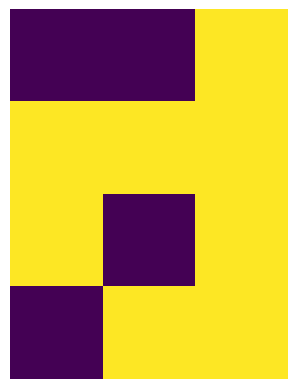

In [5]:
pl.imshow(X);
pl.axis('off')
#feature space binario molto semplice!

In [7]:
#creiamo l'output
y=np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [8]:
y.shape

(4, 1)

In [10]:
#l'idea è di predirre l'output sulla base del network
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#1 Layer Neural Network

4 osservazioni
3 neuroni
1 layer

il modello di riferimento è il perceptron, dobbiamo quindi definire i pesi **$w_i$**, il bias **$b$** e la activation function **$f$**

In [11]:
#costruiamo come activation function la sigmoid
def sigmoid(x):
  return 1. / (1. +np.exp(-x))

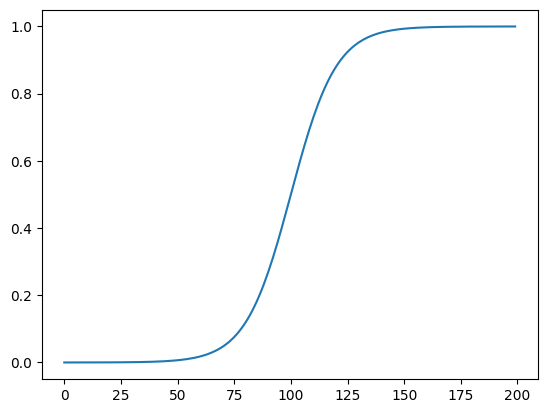

In [12]:
#test per vedere se la sigmoid è fatta bene
pl.plot(sigmoid(np.arange(-10,10, 0.1)))

In [13]:
#costruiamo la loss function
#costruiamo in particolare un vettore distanza tra
#valori reali e valori predetti
def loss(prediction, target):
  return target - prediction

In [20]:
#definiamo la derivata della sigmoid per poter fare la gradient descent
#si fa su wolphram in maniera molto facile
def dsigmoid(x):
  return sigmoid(x)* (1. -sigmoid(x))

Iniziamo il neural network vero e proprio! L'architettura si basa sullo stochastic gradient descent, e si deve fissare un criterio di convergenza. E' bene stabilire il numero di iterazioni massime da fare per un neural network.

In [15]:
#Assegno un valore iniziale ai miei weights e al mio bias, e diamo uno
#starting point random
#mettiamo l'hyperparameter del numero max di iterazioni
training = 6000

In [29]:
#layer of synopses /neurons che sia 4 x 3
# 4 x 3 dot 3 x 1
np.random.seed(302)

#con la synapsis iniziale standardizzo i pesi della mia
#synapsis in una funzione tra -1 e 1
syn0 = 2 * np.random.random((3, 1)) - 1
print(syn0.shape)
print(syn0)

loss_output = []

#inizio il mio training
#assumo che il bias b=0

for iter in range(training):
  inputLayer = X
  
  #questa è la forward propagation
  #linear regression
  l1 = np.dot(inputLayer, syn0)
  #activations
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  #funzione con cui costruisco una loss function cumulativa
  loss_output.append(np.abs(output_error).sum())
  #definiamo il gradient descent
  #calculate correction
  #questa operazione si chiama backpropagation
  output_delta = output_error * dsigmoid(output)
  # += significa correggo
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

(3, 1)
[[-0.80017145]
 [-0.16595905]
 [-0.64736336]]
output after training
 [[1.20559228e-03]
 [9.98978809e-01]
 [9.99320255e-01]
 [8.02539175e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

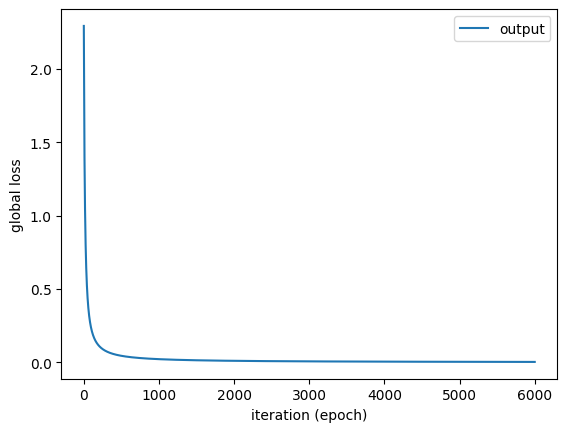

In [30]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")

# 2 Layer Neural Network:

Abbiamo sempre la struttura di prima, ovverosia prendiamo come activation function la sigmoid già definita e come numero massimo di iterazioni 6000. Ripartiamo dall'architettura, vedendo di definire il livello 2

Ho due livelli:

INPUT

LAYER 1 -> 3 NEURONS

LAYER 2 -> 5 NEURONS

OUTPUT

In [57]:
np.random.seed(302)

# 4 x 3 dot 3 x 5 dot 5 x 1

syn0 = 2 * np.random.random((3,5)) - 1
syn1 = 2 * np.random.random((5,1)) - 1

loss_output = []
loss_hidden = []

#inizio il mio training
#assumo che il bias b=0

for iter in range(training):
  inputLayer = X
  
  l1 = np.dot(inputLayer, syn0)
  hidden = sigmoid(l1)
  hidden_error = loss(hidden, y)
  loss_hidden.append(np.abs(hidden_error).sum())

  l2 = np.dot(hidden, syn1)
  #calculate error
  output = sigmoid(l2)
  output_error = loss(output, y)

  loss_output.append(np.abs(output_error).sum())
  
  hidden_delta = hidden_error * dsigmoid(hidden)
  output_delta = output_error * dsigmoid(output)
  # += significa correggo
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(output.T, output_delta)


print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.50000024]
 [0.4999983 ]
 [0.49999851]
 [0.49999997]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

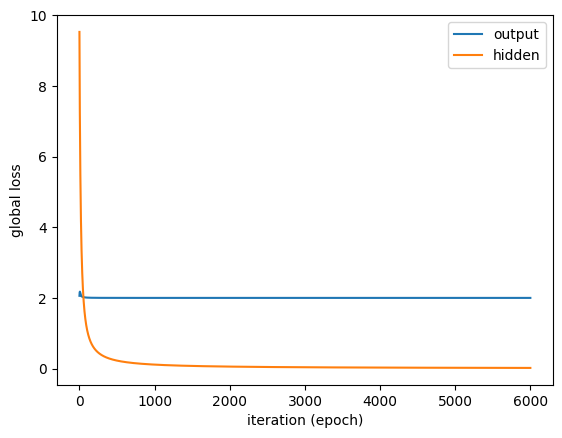

In [58]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")